In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/Netflix Dataset 1 (2).csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [20]:
#DataType to date
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors='coerce')

In [11]:
print("\nDataset Shape:", df.shape)
print("\nMissing Values:\n", df.isna().sum())



Dataset Shape: (7789, 12)

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      98
Rating             7
Duration           0
Type               0
Description        0
Release_Year       0
dtype: int64


In [15]:
#display null rows
df[df.isna().any(axis=1)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1597363200000000000
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",1543536000000000000
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,1558051200000000000
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",nan,2019-03-20,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",1553040000000000000
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",1526428800000000000
...,...,...,...,...,...,...,...,...,...,...,...,...
7779,s7778,TV Show,Zombie Dumb,NaN,NaN,nan,2019-07-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",1561939200000000000
7781,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,1574726400000000000
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,nan,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",1600992000000000000
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,1604102400000000000


In [13]:
#Cleaning data
for col in ["Country", "Release_Date", "Rating"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

In [16]:
df.to_csv("netflix_cleaned.csv", index=False)

In [25]:
df['release_year'] = df['Release_Date'].dt.year
df['release_year'].dtypes

dtype('float64')

In [31]:
# Re-extract the year from 'Release_Date' to ensure we start with a numeric type
df['release_year'] = df['Release_Date'].dt.year

# Convert 'release_year' to integer, handling potential NaNs
df['release_year'] = df['release_year'].astype('Int64')

# Convert 'release_year' to datetime objects (representing the year)
# We can construct a string in the format 'YYYY-01-01' and then convert it to datetime
df['release_year'] = pd.to_datetime(df['release_year'].astype(str) , errors='coerce')

display(df.head())
display(df['release_year'].dtype)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,release_year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-01-01
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-01-01
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-01-01
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-01-01
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


dtype('<M8[ns]')

In [35]:
type_year = (
    df.dropna(subset=["release_year", "Category"])
      .groupby(["release_year", "Category"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

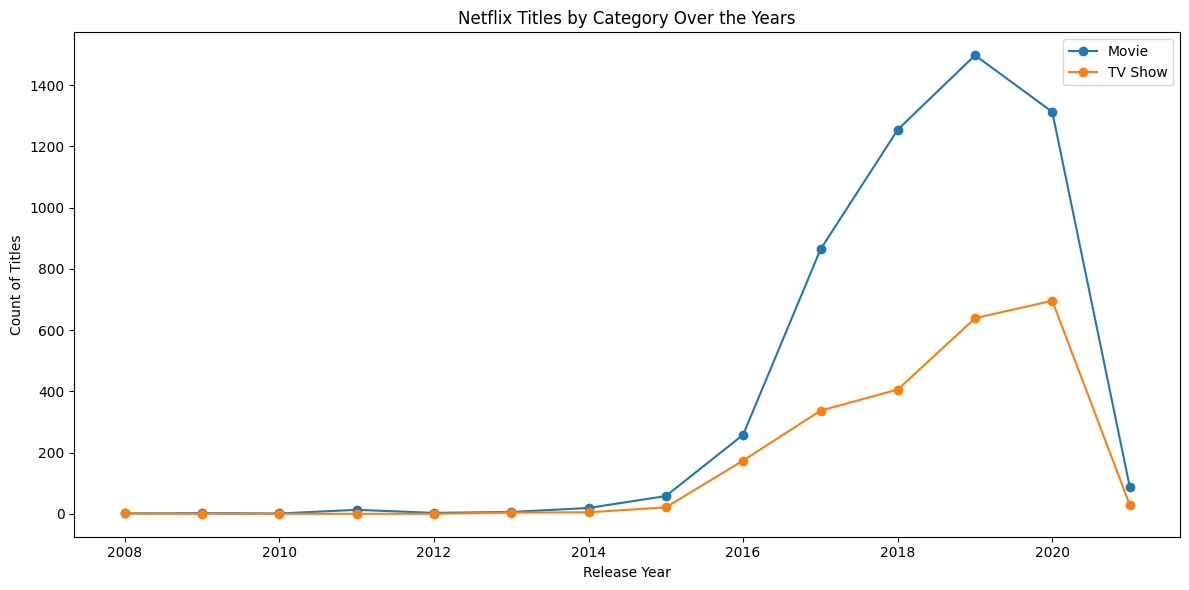

In [36]:
plt.figure(figsize=(12, 6))
for col in type_year.columns:
    plt.plot(type_year.index, type_year[col], label=col, marker='o')
plt.")
plt.ylabel("Count of Titles")
plt.title("Netflix Titles by Category Over the Years")
plt.tight_layout()
plt.show()

## Prepare genre data

Split the 'Type' column to get individual genres and handle multiple genres per title.


**Reasoning**:
Split the 'Type' column and transform the data to a long format to have each genre on a separate row.



In [37]:
genres_df = df['Type'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('Genre')
genres_df = genres_df.join(df['Show_Id'])
genres_df = genres_df[['Show_Id', 'Genre']]
genres_df['Genre'] = genres_df['Genre'].str.strip()
display(genres_df.head())

,Show_Id,Genre
0,s1,International TV Shows
0,s1,TV Dramas
0,s1,TV Sci-Fi & Fantasy
1,s2,Dramas
1,s2,International Movies


## Calculate genre popularity over time
Group the data by year and genre to count the occurrences of each genre.


**Reasoning**:
Merge the genres dataframe with the original dataframe, group by year and genre, count occurrences, unstack, and fill missing values.



In [38]:
merged_df = pd.merge(genres_df, df[['Show_Id', 'release_year']], on='Show_Id')

genre_counts_by_year = (
    merged_df.groupby(['release_year', 'Genre'])
    .size()
    .unstack(fill_value=0)
)
display(genre_counts_by_year.head())

Genre,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
release_year,,,,,,,,,,,,,,,,,,,,,
2008-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-01,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2012-01-01,0,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


## Identify most common genres
Determine the top 15 most common genres across all years.


**Reasoning**:
Calculate the total count of each genre, sort them, and select the top N genres.



## Visualize genre popularity over time
Plot the popularity of the most common genres over the years.


**Reasoning**:
Filter the genre counts to include only the top genres and then plot the popularity of these genres over the years.



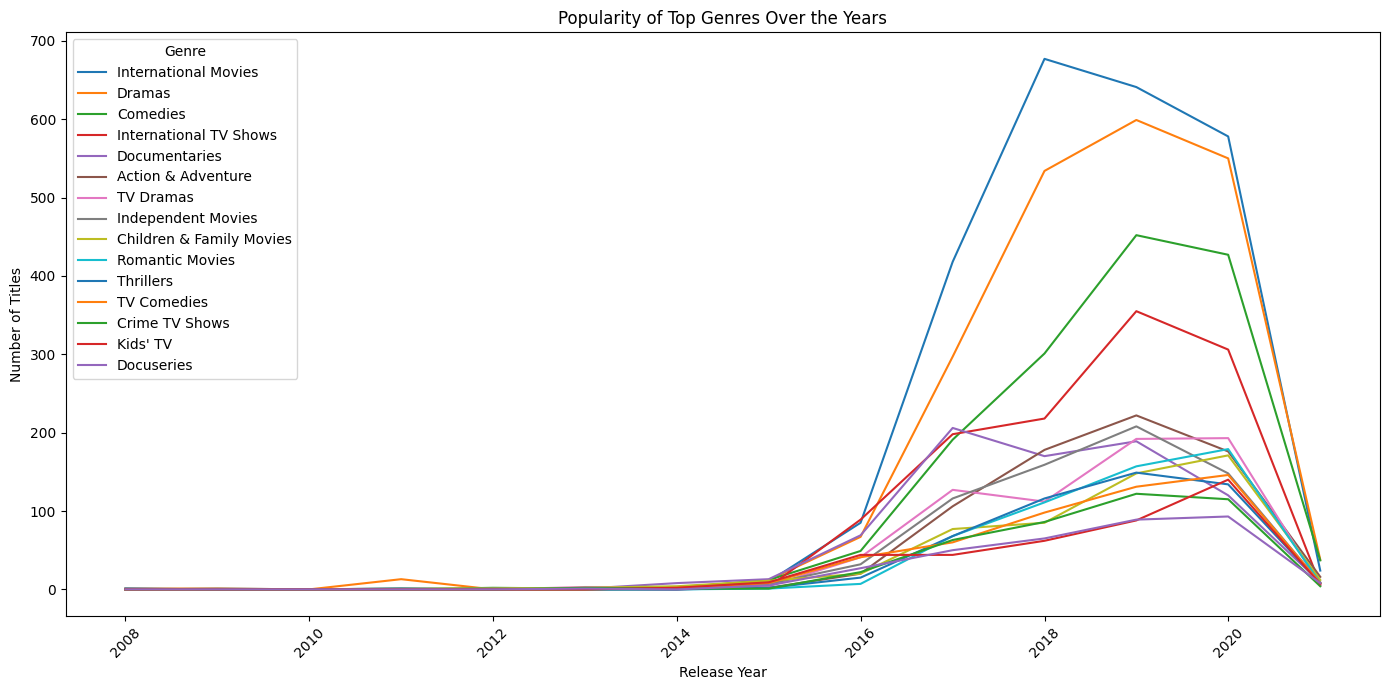

In [43]:
genre_counts_top = genre_counts_by_year[top_genres]

plt.figure(figsize=(14, 7))
for genre in genre_counts_top.columns:
    plt.plot(genre_counts_top.index, genre_counts_top[genre], label=genre)

plt.title("Popularity of Top Genres Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze country contributions


In [44]:
country_counts = df['Country'].value_counts()
display(country_counts.head())

,count
Country,
United States,2556
India,923
nan,507
United Kingdom,397
Japan,226


## Handle multiple countries
Address titles that are associated with multiple countries.


In [45]:
countries_df = df['Country'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('Country')
countries_df = countries_df.join(df['Show_Id'])
countries_df = countries_df[['Show_Id', 'Country']]
countries_df['Country'] = countries_df['Country'].str.strip()
display(countries_df.head())

,Show_Id,Country
0,s1,Brazil
1,s2,Mexico
2,s3,Singapore
3,s4,United States
4,s5,United States


## Identify top countries
Determine the top N countries with the most contributions.


In [46]:
country_total_counts = countries_df['Country'].value_counts()
top_n = 10  # Choose a reasonable number for N
top_countries = country_total_counts.head(top_n).index.tolist()

print(f"Top {top_n} Most Contributing Countries:")
for country in top_countries:
    print(country)

Top 10 Most Contributing Countries:
United States
India
United Kingdom
nan
Canada
France
Japan
Spain
South Korea
Germany


## Visualize country contributions
Create a visualization to show the contributions of the top countries.


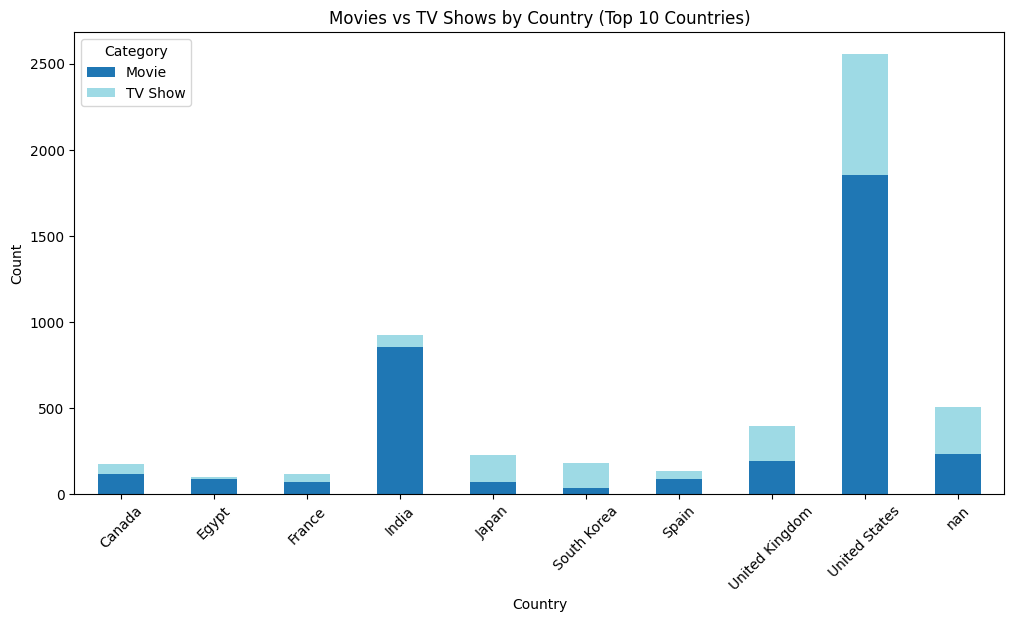

In [54]:
# Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Top Genres of each Country

In [48]:
display(countries_df.head())
display(countries_df.info())
display(genres_df.head())
display(genres_df.info())

,Show_Id,Country
0,s1,Brazil
1,s2,Mexico
2,s3,Singapore
3,s4,United States
4,s5,United States


<class 'pandas.core.frame.DataFrame'>
Index: 9576 entries, 0 to 7788
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Show_Id  9576 non-null   object
 1   Country  9576 non-null   object
dtypes: object(2)
memory usage: 224.4+ KB


None

,Show_Id,Genre
0,s1,International TV Shows
0,s1,TV Dramas
0,s1,TV Sci-Fi & Fantasy
1,s2,Dramas
1,s2,International Movies


<class 'pandas.core.frame.DataFrame'>
Index: 17077 entries, 0 to 7788
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Show_Id  17077 non-null  object
 1   Genre    17077 non-null  object
dtypes: object(2)
memory usage: 400.2+ KB


None

/tmp/ipython-input-3027326431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=country_data, palette='viridis')


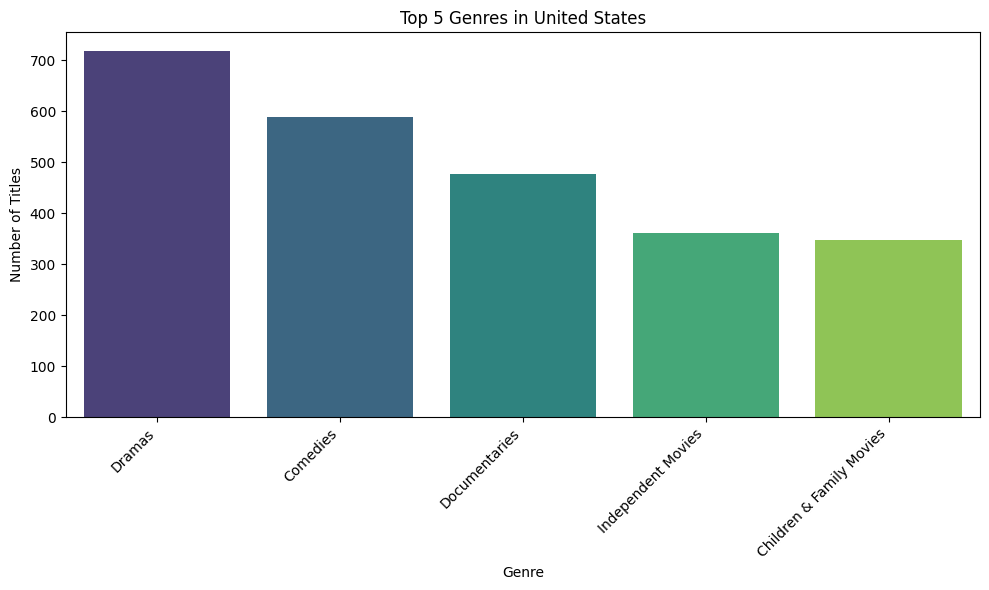

/tmp/ipython-input-3027326431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=country_data, palette='viridis')


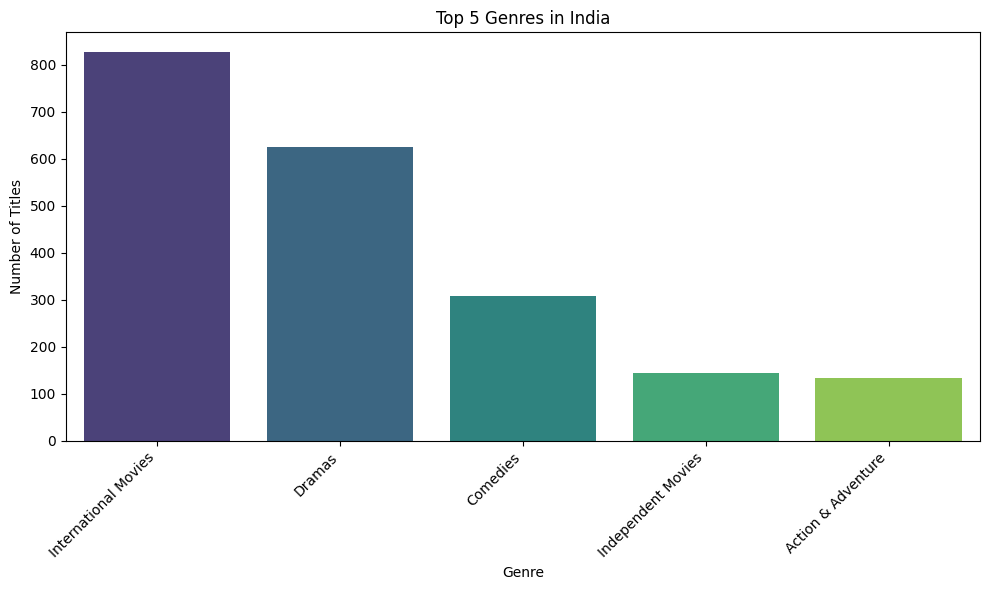

/tmp/ipython-input-3027326431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=country_data, palette='viridis')


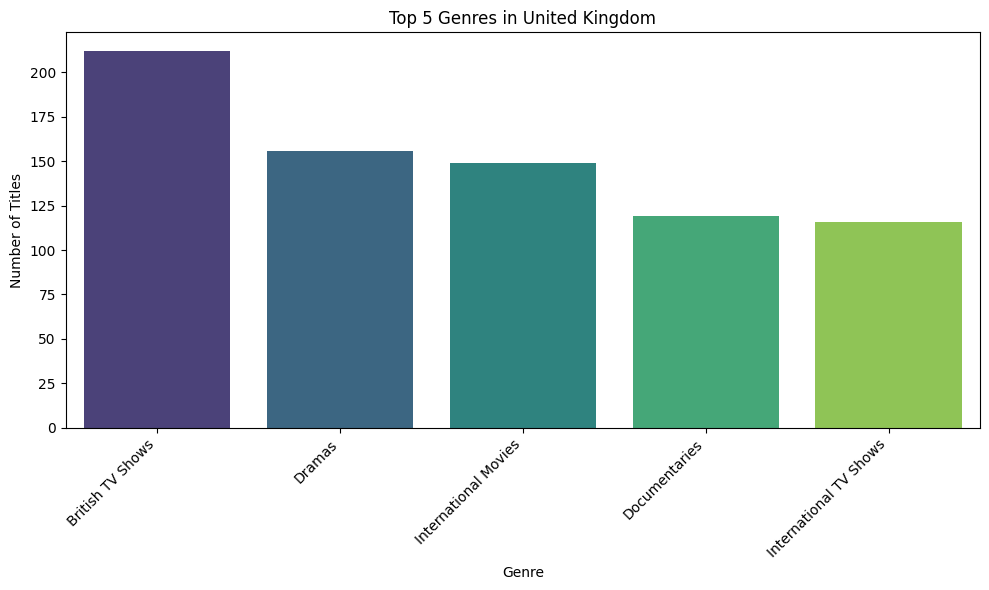

/tmp/ipython-input-3027326431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=country_data, palette='viridis')


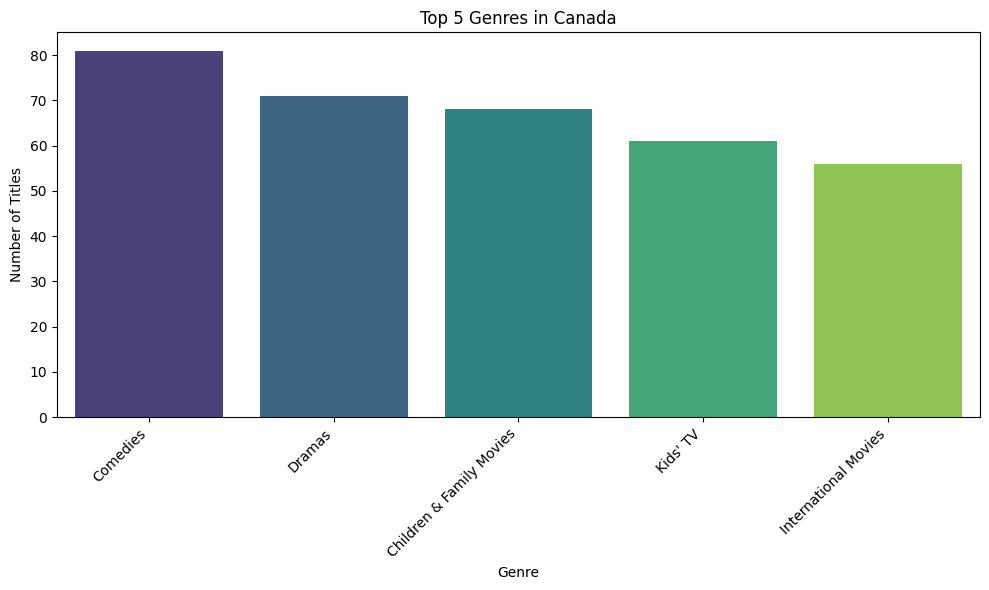

/tmp/ipython-input-3027326431.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=country_data, palette='viridis')


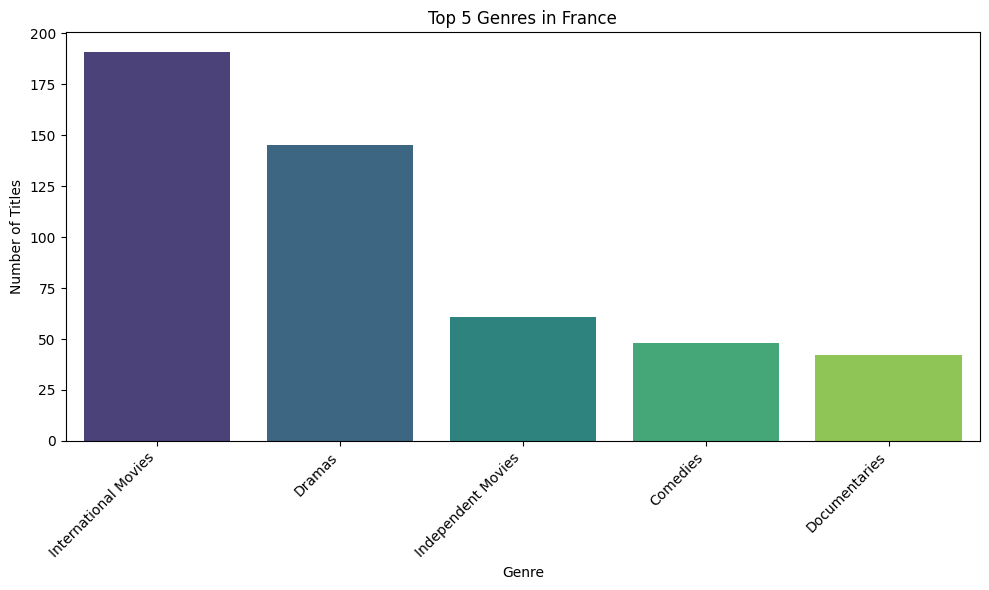

In [53]:
# Select a few countries to visualize
countries_to_visualize = ['United States', 'India', 'United Kingdom', 'Canada', 'France']

# Filter the top_genres_per_country DataFrame for these countries
top_genres_selected_countries = top_genres_per_country[top_genres_per_country['Country'].isin(countries_to_visualize)]

# Visualize the top genres for each selected country
for country in countries_to_visualize:
    country_data = top_genres_selected_countries[top_genres_selected_countries['Country'] == country]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Genre', y='Count', data=country_data, palette='viridis')
    plt.title(f'Top {top_n} Genres in {country}')
    plt.xlabel('Genre')
    plt.ylabel('Number of Titles')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()